In [1]:
#Niveau du log
def defi_level(message):
    z = re.findall(r'[C,c][R,r][I,i][T,t][I,i][C,c]\w+',message)
    a = 0
    if len(z)==0:
        z = re.findall(r'[C,c][R,r][I,i][T,t][I,i][C,c]',message)
    if len(z)==0:
        z = re.findall(r'[I,i][N,n][F,f][O,o]\w+',message)
    if len(z)==0:
        z = re.findall(r'[W,w][A,a]R,r][N,n]\w+',message)
    if len(z)==0:
        z = re.findall(r'[F,f][A,a][T,t][A,a][L,l]\w+',message)
    if len(z)==0:
        z = re.findall(r'([E,e][R,r][R,r].? )|([E,e][R,r][R,r][O,o]\w+)',message)    
        if len(z)!= 0:
           a = 1
           level = "Err"
    if len(z)==0:
        z = re.findall(r'[I,i][N,n][F,f][O,o]',message)
    if len(z)==0:
        z = re.findall(r'[W,w][A,a]R,r][N,n]',message)
    if len(z)==0:
        z = re.findall(r'[F,f][A,a][T,t][A,a][L,l]',message)
    if len(z)==0:
        z = re.findall(r'[E,e][R,r][R,r]',message)
    if len(z)!=0 and a == 0:
        level = z[0]
    if len(z)==0:
        level = "trace"
    return(level)

#Formatage de la date
def formatagedate(date_d):
    MOIS = {"Jan" : "01","Feb" : "02","Mar" : "03","Apr" : "04","May" : "05","Jun" : "06",
            "Jul" : "07","Aug" : "08","Sep" : "09","Oct" : "10","Nov" : "11","Dec" : "12"}   
    date_d = str(date_d)
    liste_date = date_d.split()
    if len(liste_date)== 3:
        mois = MOIS.get("%s"%liste_date[0])
        date_d = "2021"+"/"+str(mois)+"/"+ liste_date[1]+" "+liste_date[2]
    return(date_d)


# Load des données + library

In [12]:
#Il faut ajouter ça 

#ip_machine = str(input("Entrez l'adresse IP de la machine (format : 10.78.120.XXX)))
#Télécharger pip et pandas
import re
import pandas as pd

import datetime
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#type attaque
def typeattaque(regex_attaque,string_a_tester):
    prog = re.compile(regex_attaque)
    return int((bool(prog.search(string_a_tester)))*1)

datetime = datetime.datetime.now().replace(microsecond=0)

df =pd.read_csv(r'dataframe_multilogdeuxpc.csv',error_bad_lines=False)
df.shape

(385013, 17)

# Colonnes à ajouter avant elastic search

In [13]:

df['sql']= df.apply(lambda x: typeattaque("[sS][qQ][Ll]|[uU][nN][iI][Oo][nN]|[sS][eE][lL][eE][cC][tT]|[dD][rR][oO][pP]|[cC][oO][uU][nN][tT]|[iI][nN][sS][eE][rR][tT]|[uU][pP][dD][aA][tT][eE]",x['raw']), axis=1)
df['nmap']= df.apply(lambda x: typeattaque("[nN][mM][aA][pP]",x['raw']), axis=1)
df['ssh']= df.apply(lambda x: typeattaque("[sS][sS][hH]",x['raw']), axis=1)
df['ftp']= df.apply(lambda x: typeattaque("[fF][tT][pP]",x['raw']), axis=1)
df['http']= df.apply(lambda x: typeattaque("[hH][tT][tT][pP]",x['raw']), axis=1)
df['Nikto']= df.apply(lambda x: typeattaque("[nN][iI][kK][tT][oO]",x['raw']), axis=1)
df['password']= df.apply(lambda x: typeattaque("[pP][aA][sS][sS][wW][oO][rR][dD]",x['raw']), axis=1)
df['ip']=df['raw'].str.extract(r'\b(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})\b',expand=False).str.strip()
#df['ip'] = df['ip'].replace('',ip_machine)
#df['ip']= df['ip'].fillna(ip_machine)

df = df[ df.date != '2030/12/31 23:58:59']

In [10]:
df[df["ftp"] == 1]

,raw,date,utilisateur,process,message_log,source,date_traitement,1,2,level,ssh,nmap,ftp,http,Nikto,ip,ipp,sql,password
75,Nov 16 10:08:48 node6 dnsmasq[1249]: compile t...,2021/11/16 10:08:48,node6,dnsmasq[1249]:,compile time options: IPv6 GNU-getopt DBus i18...,syslog,2021-11-16 17:26:23,NaN,NaN,trace,0,0,1,0,0,NaN,0,0,0
15049,Nov 16 14:02:20 node6 sudo: xibalpa : TTY=pts...,2021/11/16 14:02:20,node6,no process,node6 sudo: xibalpa : TTY=pts/0 ; PWD=/var/l...,auth,2021-11-16 17:26:23,NaN,NaN,trace,0,0,1,0,0,NaN,0,0,0
15052,Nov 16 14:02:31 node6 sudo: xibalpa : TTY=pts...,2021/11/16 14:02:31,node6,no process,node6 sudo: xibalpa : TTY=pts/0 ; PWD=/var/l...,auth,2021-11-16 17:26:23,NaN,NaN,trace,0,0,1,0,0,NaN,0,0,0
15061,Nov 16 14:37:42 node6 sudo: xibalpa : TTY=pts...,2021/11/16 14:37:42,node6,no process,node6 sudo: xibalpa : TTY=pts/0 ; PWD=/home/...,auth,2021-11-16 17:26:23,NaN,NaN,trace,0,0,1,0,0,NaN,0,0,0
15067,Nov 16 14:37:42 node6 sudo: xibalpa : TTY=pts...,2021/11/16 14:37:42,node6,no process,node6 sudo: xibalpa : TTY=pts/0 ; PWD=/home/...,auth,2021-11-16 17:26:23,NaN,NaN,trace,0,0,1,0,0,NaN,0,0,0
15085,Nov 16 14:38:50 node6 sudo: xibalpa : TTY=pts...,2021/11/16 14:38:50,node6,no process,node6 sudo: xibalpa : TTY=pts/0 ; PWD=/home/...,auth,2021-11-16 17:26:23,NaN,NaN,trace,0,0,1,0,0,NaN,0,0,0
15091,Nov 16 14:38:50 node6 sudo: xibalpa : TTY=pts...,2021/11/16 14:38:50,node6,no process,node6 sudo: xibalpa : TTY=pts/0 ; PWD=/home/...,auth,2021-11-16 17:26:23,NaN,NaN,trace,0,0,1,0,0,NaN,0,0,0
15109,Nov 16 14:39:41 node6 sudo: xibalpa : TTY=pts...,2021/11/16 14:39:41,node6,no process,node6 sudo: xibalpa : TTY=pts/0 ; PWD=/home/...,auth,2021-11-16 17:26:23,NaN,NaN,trace,0,0,1,0,0,NaN,0,0,0
15115,Nov 16 14:39:41 node6 sudo: xibalpa : TTY=pts...,2021/11/16 14:39:41,node6,no process,node6 sudo: xibalpa : TTY=pts/0 ; PWD=/home/...,auth,2021-11-16 17:26:23,NaN,NaN,trace,0,0,1,0,0,NaN,0,0,0
15137,Nov 16 15:19:31 node6 sudo: xibalpa : TTY=pts...,2021/11/16 15:19:31,node6,no process,node6 sudo: xibalpa : TTY=pts/0 ; PWD=/home/...,auth,2021-11-16 17:26:23,NaN,NaN,trace,0,0,1,0,0,NaN,0,0,0


# Viz des labels trouvés sur les logs

In [19]:
#création des labels pour l'entrainement    
column_names = ['sql','ipp','ftp','Nikto','nmap','password','ssh','http']
df['Somme_patterns']= df[column_names].sum(axis=1)
df['Somme_patterns'].fillna(0, inplace=True)    
print("Counts de la somme des colonnes \n",df['Somme_patterns'].value_counts())


df.loc[(df['Somme_patterns']==0),"Result"] = "RAS" 
df.loc[(df['ipp']==1),"Result"] = "IPD"
df.loc[(df['ssh']==1),"Result"] = "SSH"
df.loc[(df['ftp']==1),"Result"] = "ASM"
df.loc[(df['sql']==1),"Result"] = "SQLA"
#df.loc[(df['nmap']==1)&(df['ipp']==1),"Result"] = "SP"
df.loc[(df['Nikto']==1)&(df['http']==1),"Result"] = "SVM"
df.loc[(df['nmap']==1)&(df['ipp']==1)&(df['ssh']==1),"Result"] = "SPM"
#df.loc[(df['sql']==1)&(df['password']==1),"Result"] = "SQLTA"
print("\nCounts des types de labels trouvés\n",df['Result'].value_counts())
#df.loc[(df['Somme_patterns']>=4),"Result"] = "EC"
df['Result'].fillna('RAS', inplace=True)    
print(df.shape)

Counts de la somme des colonnes 
 2    357939
0     15147
3      7230
1       521
4       197
5         1
Name: Somme_patterns, dtype: int64

Counts des types de labels trouvés
 IPD     358036
RAS      15251
SVM       6206
SQLA       888
ASM        329
SSH        325
Name: Result, dtype: int64
(381035, 21)


In [21]:
dfa = df.copy()

In [26]:
df = dfa

381035

In [27]:
print(len(df[(df['ipp']==1)  ])) # &(df['http']==1)]))    # voir nombre de log avec cette colonne = 1
#df[(df['ipp']==1)  &(df['nmap']==1)]

365442


# Compact par le temps des rows

In [82]:
print(df.shape)
df_saved = df
df['date'] =  pd.to_datetime(df['date'])
print(df.shape)
df.set_index('date',inplace=True)
df=df.resample('2s').mean()

print(df.shape)
df = df[df['ssh'].notna()&df["nmap"].notna()&df["Nikto"].notna()&df["ftp"].notna()&df["ipp"].notna()&df["sql"].notna()&df["ftp"].notna()&df["password"].notna()]
print(df.shape)
for col in df:
    df.loc[df[col]!=0.0,col]=1
    df[col] = df[col].apply(np.int64)  
print(df.shape)    


(381035, 19)
(381035, 19)
(11968015, 8)
(1206, 8)
(1206, 8)


## Labélisation

In [28]:
#regles à redéfinir 

#création des labels pour l'entrainement    
column_names = ['sql','ipp','ftp','Nikto','nmap','password','ssh','http']
df['Somme_patterns']= df[column_names].sum(axis=1)
df['Somme_patterns'].fillna(0, inplace=True)    
print("Counts de la somme des colonnes \n",df['Somme_patterns'].value_counts())

df.loc[(df['Somme_patterns']==0),"Result"] = "RAS" 
df.loc[(df['ipp']==1),"Result"] = "IPD"
df.loc[(df['ssh']==1),"Result"] = "SSH"
df.loc[(df['ftp']==1),"Result"] = "ASM"
df.loc[(df['sql']==1),"Result"] = "SQLA"
#df.loc[(df['nmap']==1)&(df['ipp']==1),"Result"] = "SP"
df.loc[(df['Nikto']==1)&(df['http']==1),"Result"] = "SVM"
df.loc[(df['nmap']==1)&(df['ipp']==1)&(df['ssh']==1),"Result"] = "SPM"
#df.loc[(df['sql']==1)&(df['password']==1),"Result"] = "SQLTA"
print("\nCounts des types de labels trouvés\n",df['Result'].value_counts())
#df.loc[(df['Somme_patterns']>=4),"Result"] = "EC"
df['Result'].fillna('RAS', inplace=True)    
print(df.shape)

df_train = df.drop("Result",axis =1)
print(df['Result'].value_counts())
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(df_train, df["Result"])



print(y_res.value_counts())

Counts de la somme des colonnes 
 2    357939
0     15147
3      7230
1       521
4       197
5         1
Name: Somme_patterns, dtype: int64

Counts des types de labels trouvés
 IPD     358036
RAS      15251
SVM       6206
SQLA       888
ASM        329
SSH        325
Name: Result, dtype: int64
(381035, 21)
IPD     358036
RAS      15251
SVM       6206
SQLA       888
ASM        329
SSH        325
Name: Result, dtype: int64
RAS     325
SQLA    325
ASM     325
IPD     325
SVM     325
SSH     325
Name: Result, dtype: int64


In [29]:
X_res 

,raw,date,utilisateur,process,message_log,source,date_traitement,1,2,level,ssh,nmap,ftp,http,Nikto,ip,ipp,sql,password,Somme_patterns
0,Nov 16 15:19:31 node6 sudo: xibalpa : TTY=pts...,2021/11/16 15:19:31,node6,no process,node6 sudo: xibalpa : TTY=pts/0 ; PWD=/home/...,auth,2021-11-16 17:26:23,NaN,NaN,trace,0,0,1,0,0,NaN,0,0,0,1
1,10.78.120.57 - - [16/Nov/2021:15:54:31 +0100] ...,2021/11/16 15:54:31,no utilisateur,no process,10.78.120.57 - - [16/Nov/2021:15:54:31 +0100] ...,accesslog,2021-11-16 17:26:23,NaN,NaN,trace,0,0,1,1,0,10.78.120.57,1,0,0,3
2,10.78.120.57 - - [16/Nov/2021:15:54:19 +0100] ...,2021/11/16 15:54:19,no utilisateur,no process,10.78.120.57 - - [16/Nov/2021:15:54:19 +0100] ...,accesslog,2021-11-16 17:26:23,NaN,NaN,trace,0,0,1,1,0,10.78.120.57,1,0,0,3
3,10.78.120.57 - - [16/Nov/2021:15:53:19 +0100] ...,2021/11/16 15:53:19,no utilisateur,no process,10.78.120.57 - - [16/Nov/2021:15:53:19 +0100] ...,accesslog,2021-11-16 17:26:23,NaN,NaN,trace,0,0,1,1,0,10.78.120.57,1,0,0,3
4,10.78.120.57 - - [16/Nov/2021:15:53:41 +0100] ...,2021/11/16 15:53:41,no utilisateur,no process,10.78.120.57 - - [16/Nov/2021:15:53:41 +0100] ...,accesslog,2021-11-16 17:26:23,NaN,NaN,trace,0,0,1,1,0,10.78.120.57,1,0,0,3
5,10.78.120.57 - - [16/Nov/2021:15:53:50 +0100] ...,2021/11/16 15:53:50,no utilisateur,no process,10.78.120.57 - - [16/Nov/2021:15:53:50 +0100] ...,accesslog,2021-11-16 17:26:23,NaN,NaN,trace,0,0,1,1,0,10.78.120.57,1,0,0,3
6,10.78.120.57 - - [16/Nov/2021:15:53:38 +0100] ...,2021/11/16 15:53:38,no utilisateur,no process,10.78.120.57 - - [16/Nov/2021:15:53:38 +0100] ...,accesslog,2021-11-16 17:26:23,NaN,NaN,trace,0,0,1,1,0,10.78.120.57,1,0,0,3
7,10.78.120.57 - - [16/Nov/2021:15:56:48 +0100] ...,2021/11/16 15:56:48,no utilisateur,no process,10.78.120.57 - - [16/Nov/2021:15:56:48 +0100] ...,accesslog,2021-11-16 17:26:23,NaN,NaN,trace,0,0,1,1,0,10.78.120.57,1,0,0,3
8,10.78.120.57 - - [16/Nov/2021:16:00:30 +0100] ...,2021/11/16 16:00:30,no utilisateur,no process,10.78.120.57 - - [16/Nov/2021:16:00:30 +0100] ...,accesslog,2021-11-16 17:26:23,NaN,NaN,trace,0,0,1,1,0,10.78.120.57,1,0,0,3
9,10.78.120.57 - - [16/Nov/2021:15:55:03 +0100] ...,2021/11/16 15:55:03,no utilisateur,no process,10.78.120.57 - - [16/Nov/2021:15:55:03 +0100] ...,accesslog,2021-11-16 17:26:23,NaN,NaN,trace,0,0,1,1,0,10.78.120.57,1,0,0,3


## A faire si on a fait le resample

In [30]:
X_res['Result'] = y_res
df = X_res[['ssh',"nmap","Nikto","ftp","ipp","sql","http","password","Result"]].copy()
print(df.shape)

(1950, 9)


In [31]:
for col in ['ssh',"nmap","Nikto","ftp","ipp","sql","http","password"]:
    df[col] = df[col].astype('category',copy=False)    


## TRAINING RF

###Transformer les features simples de type objects en type binaire


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 9 columns):
ssh         1950 non-null category
nmap        1950 non-null category
Nikto       1950 non-null category
ftp         1950 non-null category
ipp         1950 non-null category
sql         1950 non-null category
http        1950 non-null category
password    1950 non-null category
Result      1950 non-null object
dtypes: category(8), object(1)
memory usage: 31.3+ KB


# Séparer notre dataset en trainset et en testset

In [33]:
X = df.drop('Result',axis=1) #enlever y 
#X = df.drop('group',axis=1)   #si il y'a group 
y = df['Result']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [35]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
RandFor = RandomForestClassifier(n_estimators = 100, bootstrap=False ,random_state = 42, max_leaf_nodes=2)
''' #qd optimisation a ete faite : 
RandFor = RandomForestClassifier(criterion = a['criterion'], max_depth = a['max_depth'], n_estimators =a['n_estimators'])'''
'''{'criterion': 'gini',
 'max_depth': 13,
 'max_features': 135,
 'n_estimators': 482}'''
# Train the model on training data
RandFor.fit(X_train, y_train);

In [36]:
#For train data
y_prob_train = RandFor.predict_proba(X_train)[:,1]
y_pred_train = RandFor.predict(X_train)

In [37]:
# for test data
y_prob = RandFor.predict_proba(X_test)[:,1]
y_pred = RandFor.predict(X_test) #to change threshold should do it manually

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Accuracy for test: ',accuracy_score(y_test,y_pred))

Accuracy for test:  1.0


In [39]:
print('Confusion matrix - Train: ','\n',confusion_matrix(y_train,y_pred_train))
print('Overall accuracy - Train: ',accuracy_score(y_train,y_pred_train))

Confusion matrix - Train:  
 [[281   0   0   0   0   0]
 [  0 276   0   0   0   0]
 [  0   0 272   0   0   0]
 [  0   0   0 264   0   0]
 [  0   0   0   0 276   0]
 [  0   0   0   0   0 288]]
Overall accuracy - Train:  1.0


In [40]:
print('Confussion matrix - Test: ','\n',confusion_matrix(y_test,y_pred))
print('Overall accuracy - Test: ',accuracy_score(y_test,y_pred))

Confussion matrix - Test:  
 [[44  0  0  0  0  0]
 [ 0 49  0  0  0  0]
 [ 0  0 53  0  0  0]
 [ 0  0  0 61  0  0]
 [ 0  0  0  0 49  0]
 [ 0  0  0  0  0 37]]
Overall accuracy - Test:  1.0


In [41]:
# for train
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         ASM       1.00      1.00      1.00       281
         IPD       1.00      1.00      1.00       276
         RAS       1.00      1.00      1.00       272
        SQLA       1.00      1.00      1.00       264
         SSH       1.00      1.00      1.00       276
         SVM       1.00      1.00      1.00       288

    accuracy                           1.00      1657
   macro avg       1.00      1.00      1.00      1657
weighted avg       1.00      1.00      1.00      1657



In [42]:
# for test
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ASM       1.00      1.00      1.00        44
         IPD       1.00      1.00      1.00        49
         RAS       1.00      1.00      1.00        53
        SQLA       1.00      1.00      1.00        61
         SSH       1.00      1.00      1.00        49
         SVM       1.00      1.00      1.00        37

    accuracy                           1.00       293
   macro avg       1.00      1.00      1.00       293
weighted avg       1.00      1.00      1.00       293



In [43]:
liste_col = []
for i in df.columns:
    liste_col.append(i)
liste_col    

['ssh', 'nmap', 'Nikto', 'ftp', 'ipp', 'sql', 'http', 'password', 'Result']

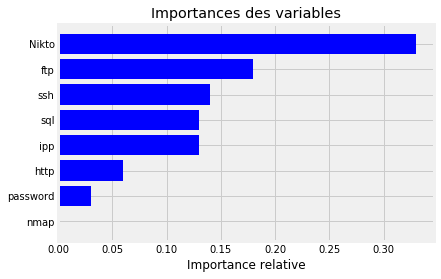

In [44]:

liste_col = []
for i in df.columns:
    liste_col.append(i)
liste_col 

importances = RandFor.feature_importances_
indices = np.argsort(importances)
# style du graphique 
plt.style.use('fivethirtyeight')

%matplotlib inline
plt.figure(1)
plt.title('Importances des variables')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_col[i] for i in indices])
plt.xlabel('Importance relative')
plt.savefig('importances_variablesCovid.png', dpi=300, bbox_inches='tight')



# SAVE du modèle

In [45]:
import pickle

# save dans un fichier que jupyter crée
with open('RandForest_model_IA_Logs.pkl','wb') as f:
    pickle.dump(RandFor,f)

#  La suite du vrai algo

In [52]:
import pickle
with open('RandForest_model_IA_Logs.pkl', 'rb') as f:       # load le modèle (le fichier doit etre dans le meme repertoire)
    RandFor = pickle.load(f)


dfe = dfa[['ssh',"nmap","Nikto","ftp","ipp","sql","http","password","Result"]].copy()
print(dfe.shape)

for col in ['ssh',"nmap","Nikto","ftp","ipp","sql","http","password"]:
    dfe[col] = dfe[col].astype('category',copy=False)      
    
    
dfe = dfe.drop("Result",axis=1)
print(dfe.columns)
dfe['Result'] = RandFor.predict(dfe)

(381035, 9)
Index(['ssh', 'nmap', 'Nikto', 'ftp', 'ipp', 'sql', 'http', 'password'], dtype='object')


In [54]:

dico =  dfe['Result'].value_counts().to_dict()

for k in dico:
    print("on a détecté ",dico.get(k),"logs avec le label", k )

on a détecté  357939 logs avec le label IPD
on a détecté  15348 logs avec le label RAS
on a détecté  6206 logs avec le label SVM
on a détecté  888 logs avec le label SQLA
on a détecté  329 logs avec le label ASM
on a détecté  325 logs avec le label SSH


In [58]:
dfe[dfe['Result'] == 'ASM']

,ssh,nmap,Nikto,ftp,ipp,sql,http,password,Result
75,0,0,0,1,0,0,0,0,ASM
15049,0,0,0,1,0,0,0,0,ASM
15052,0,0,0,1,0,0,0,0,ASM
15061,0,0,0,1,0,0,0,0,ASM
15067,0,0,0,1,0,0,0,0,ASM
15085,0,0,0,1,0,0,0,0,ASM
15091,0,0,0,1,0,0,0,0,ASM
15109,0,0,0,1,0,0,0,0,ASM
15115,0,0,0,1,0,0,0,0,ASM
15137,0,0,0,1,0,0,0,0,ASM


In [ ]:
   
def message_rapport(code):
        Message = {"RAS" : "Aucune tentative d'intrusion n'a été détecté.",
        "SSH":"On a détecté une tentative de connexion ssh. On est au début d'une attaque.",
        "SP": "On a détecté un nmap et une adresse IP différente. On est sur un scan de port donc au début d'attaque.",
        "SVM": "On a détecté un scan de vulnérabilité Nikto. On est au milieu de l'attaque.",
        "SPM":"On a détecté une tentative d\'attaque avec un scan de port. On est au milieu de l'attaque.",
        "ASM": "On a détecté une tentative d\'attaque de serveur ftp. On est au stade avancé de l'attaque.",
        "SQLA":  "On a détecté une tentative d\'injection SQL. On est au stade avancé de l'attaque.",
        "EC": "On a détecté de trop nombreuses d'intrusions. On est sur un état critique de votre pc. Eteignez-TOUT.",
        "IPD":  "On a détecté une IP différente dans les logs "}
    code = str(code)
    return(Message.get("%s"%code)) 
df['group'] = df['Result'].ne(df['Result'].shift()).cumsum()
df.drop_duplicates(subset=['group'])
print("Rapport détaillé des logs soumis à l'analyse : \n ")
for i in range(1,df.group.max()+1):
    print("  À",df.loc[df["group"]  == i].index[0],":\t",message_rapport(df.loc[df["group"]  == i].Result[0]),("\n \t\t\t\t Une IP différente a été détectée." *(df.loc[df["group"]  == i].ipp[0])) )

In [ ]:
'''
Un nmap,ipp  = "On a détecté un nmap et une adresse IP différente. On est sur un scan de port donc au début d\'attaque "

Nikto, http ==> "On a détecté un scan de vulnérabilité Nikto. On est au milieu de l\'attaque "

ssh,nmap,ipp ==> "On a détecté une tentative d\'attaque avec un scan de port. On est au milieu de l'attaque"

ftp ==>   "On a détecté une tentative d\'attaque de serveur ftp. On est au stade avancé de l'\attaque"

sql ==>  "On a détecté une tentative d\'injection SQL. On est au stade avancé de l'\attaque"

sql,password  ==>  "On a détecté une tentative d\'injection SQL. On est au stade avancé de l'\attaque"

ssh,nmap,ftp,http,Nikto,ipp,sql,union,select,drop,count,insert,update,password >= 6 ====> "On a détecté de trop nombreuses d'intrusions. On est sur un état critique de votre pc"

rien ==> "Aucune tentative d'intrusion n'a été détecté "

ipp ==>  "On a détecté une IP différente "


'''